# 测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pi = np.pi

In [2]:
def chebyshev(n):
    return np.array([np.cos((2*i + 1)*pi/(2*n)) for i in range(n)])

In [3]:
def coef(points): #函数嵌套迭代
    if len(points) == 1:
        return points[0, 1]
    return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

# 误差公式的形状

In [9]:
def e(x,n):
    f=1
    for i in range(n):
        f=f*(x-i)
    return f

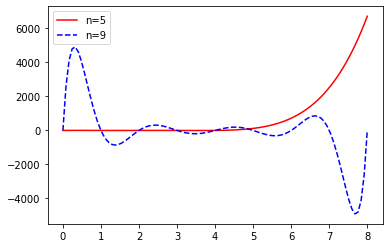

In [10]:
x=np.linspace(0, 8, 100)
plt.plot(x,e(x,5),'r-',label='n=5')
plt.plot(x,e(x,9),'b--',label='n=9')
plt.legend()
plt.show()

# 插值点的选取

In [13]:
x_range=np.linspace(-1, 1, 100)
x1=np.linspace(-1, 1, 9)
x2=chebyshev(9)
def f1(x):
    f=1
    for i in range(9):
        f=f*(x-x1[i])
    return f

def f2(x):
    f=1
    for i in range(9):
        f=f*(x-x2[i])
    return f

In [14]:
print(x1)
print(x2)

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
[ 9.84807753e-01  8.66025404e-01  6.42787610e-01  3.42020143e-01
  6.12323400e-17 -3.42020143e-01 -6.42787610e-01 -8.66025404e-01
 -9.84807753e-01]


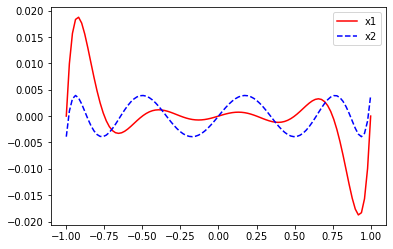

In [15]:
plt.plot(x_range,f1(x_range),'r-',label='x1')
plt.plot(x_range,f2(x_range),'b--',label='x2')
plt.legend()
plt.show()

# 切比雪夫多项式

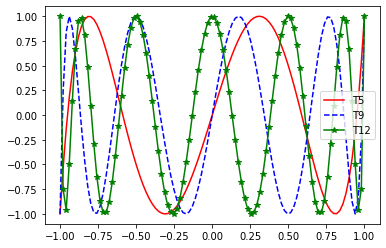

In [28]:
def CS(x,n):
    return np.cos(n*np.arccos(x))

plt.plot(x_range,CS(x_range,5),'r-',label='T5')
plt.plot(x_range,CS(x_range,9),'b--',label='T9')
plt.plot(x_range,CS(x_range,12),'g*-',label='T12')
plt.legend()
plt.show()

# 例1

In [17]:
def f(x):
    return 1.0/(1+25*x**2)

In [18]:
x1=np.linspace(-1, 1, 15)
print(x1)
x2=chebyshev(20)
print(x2)

[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
[ 0.99691733  0.97236992  0.92387953  0.85264016  0.76040597  0.64944805
  0.52249856  0.38268343  0.23344536  0.0784591  -0.0784591  -0.23344536
 -0.38268343 -0.52249856 -0.64944805 -0.76040597 -0.85264016 -0.92387953
 -0.97236992 -0.99691733]


In [19]:
y1=f(x1)
y2=f(x2)
points1= np.array([x1, y1]).T
points2= np.array([x2, y2]).T
p1=Newton(points1)
p2=Newton(points2)

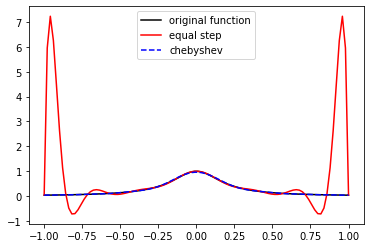

In [21]:
x_range=np.linspace(-1, 1, 100)
plt.plot(x_range,f(x_range),'k-',label='original function')
plt.plot(x_range,p1(x_range),'r-',label='equal step')
plt.plot(x_range,p2(x_range),'b--',label='chebyshev')
plt.legend()
plt.show()

# 插值的误差

In [44]:
x_range=np.linspace(-1, 1, 100)
x1=chebyshev(6)
def f1(x):
    f=1
    for i in range(6):
        f=f*(x-x1[i])
    return f
x2=chebyshev(3)
def f2(x):
    f=1
    for i in range(3):
        f=f*(x-x2[i])
    return f
x3=chebyshev(4)
def f3(x):
    f=1
    for i in range(4):
        f=f*(x-x3[i])
    return f

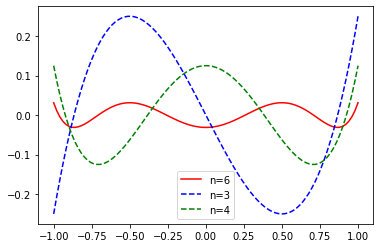

In [45]:
plt.plot(x_range,f1(x_range),'r-',label='n=6')
plt.plot(x_range,f2(x_range),'b--',label='n=3')
plt.plot(x_range,f3(x_range),'g--',label='n=4')
plt.legend()
plt.show()

# 超出范围

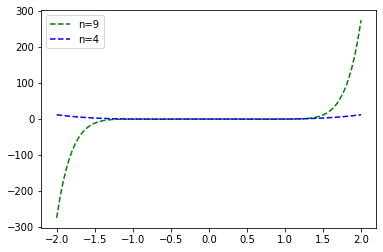

In [47]:
x_range=np.linspace(-2, 2, 100)

x9=chebyshev(9)
def f9(x):
    f=1
    for i in range(9):
        f=f*(x-x9[i])
    return f

plt.plot(x_range,f9(x_range),'g--',label='n=9')
plt.plot(x_range,f3(x_range),'b--',label='n=4')
plt.legend()
plt.show()

# 例2

In [51]:
x1=np.linspace(0, pi/2, 4)
print(x1)
x2=pi/4+0.25*pi*chebyshev(4)
print(x2)

[0.         0.52359878 1.04719755 1.57079633]
[1.51101145 1.08595703 0.4848393  0.05978488]


In [52]:
y1=np.sin(x1)
y2=np.sin(x2)
points1= np.array([x1, y1]).T
points2= np.array([x2, y2]).T
p1=Newton(points1)
p2=Newton(points2)

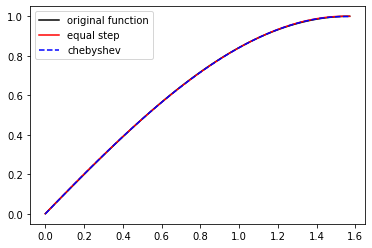

In [53]:
x_range=np.linspace(0, pi/2, 100)
plt.plot(x_range,np.sin(x_range),'k-',label='original function')
plt.plot(x_range,p1(x_range),'r-',label='equal step')
plt.plot(x_range,p2(x_range),'b--',label='chebyshev')
plt.legend()
plt.show()

# 误差

In [54]:
def e(x,xp):
    n=xp.size
    f=1
    for i in range(n):
        f=f*(x-xp[i])
    for i in range(n):
        f=f/(i+1)
    return f

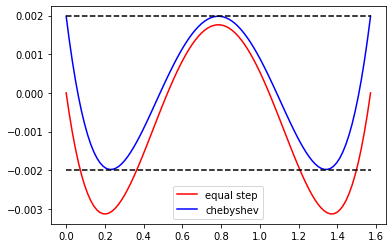

In [55]:
x_range=np.linspace(0, pi/2, 100)
y1=np.ones(100)
y2=np.ones(100)
y1=y1*(-1*(pi/4)**4/2**(4-1))/24.0
y2=y2*((pi/4)**4/2**(4-1))/24.0
plt.plot(x_range,e(x_range,x1),'r-',label='equal step')
plt.plot(x_range,e(x_range,x2),'b-',label='chebyshev')
plt.plot(x_range,y1,'k--')
plt.plot(x_range,y2,'k--')
plt.legend()
plt.show()

# 例3

In [56]:
def t2(x):
    return 2*x**2-1
def t3(x):
    return 4*x**3-3*x

def ptylor(x):
    return 1+x+x**2/2+x**3/6-np.exp(x)
def pcheby(x):
    return 81.0/64+217*x/192+13*t2(x)/48+17*t3(x)/384-np.exp(x)

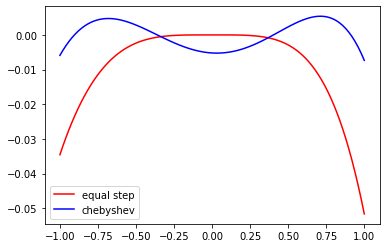

In [57]:
x_range=np.linspace(-1, 1, 100)
yt=ptylor(x_range)
yc=pcheby(x_range)
plt.plot(x_range,yt,'r-',label='equal step')
plt.plot(x_range,yc,'b-',label='chebyshev')
plt.legend()
plt.show()